In [29]:
import numpy as np
from EMRM1D import EMRM_simulator
import matplotlib.pyplot as plt


# 1). Create simulator object

In [30]:
testModel = EMRM_simulator()

# 2). Set the layered model parameters

In [31]:
# Layer thicknesses
thicknesses = np.array([6,18,90])

# dielectric constant values
eps = np.array([3.7,3.15,4.2,6.00])

# Loss tangent or conductivity values
lossOrCond = np.array([0.02, 0.002, 0.02, 0.02])

# 1 if using conductivity, 0 if using loss tangent
useConductivity = 0

# Spacecraft altitude in meters
H = 300*1000


testModel.setModel(H,thicknesses,eps,lossOrCond,useConductivity)

# 3). Set the radar pulse

In [32]:
# Load pulse from csv file. 
timeTest, pulseTest = testModel.loadPulse('Sharad_Ideal_sourcePulse.csv')

# Set pulse
testModel.setPulse(pulseTest,timeTest)

# 4). Set the radar matched filter

In [33]:
tmfTest,fmfTest,mfTest = testModel.loadMatchFilter('Sharad_Ideal_matchedFilter.csv')

testModel.setMatchFilter(mfTest,fmfTest,tmfTest)

# 5). Set the windowing parameters

In [41]:
testModel.setWindowParam(3,15*10**6,25*10**6)

# 6). Run simulation and plot result

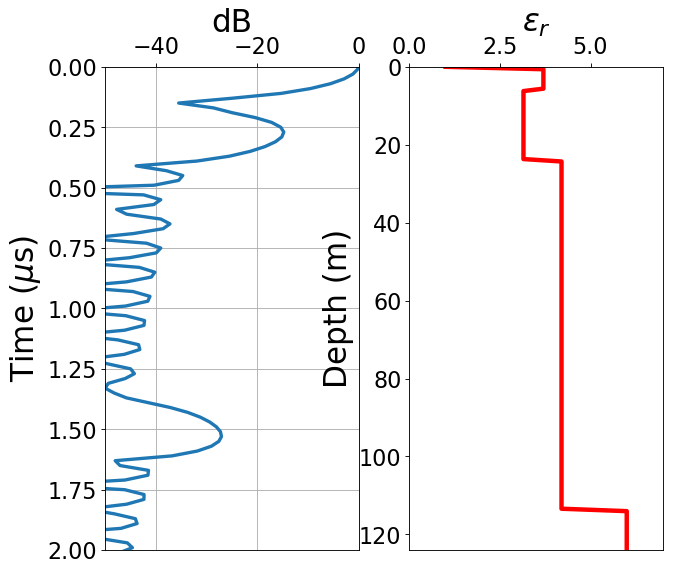

array([[-4.25000000e-05+0.00000000e+00j, -5.92075987e+01+2.39206756e+01j,
        -1.31584389e-08+5.76305163e-09j],
       [-4.24799953e-05+0.00000000e+00j, -5.98122151e+01-6.83575078e+00j,
         9.21755470e-09-9.72498938e-09j],
       [-4.24599906e-05+0.00000000e+00j, -6.13413417e+01+1.65414707e+01j,
        -3.41087767e-09+1.07060737e-08j],
       ...,
       [ 4.24599906e-05+0.00000000e+00j, -6.16189527e+01+7.01783684e+00j,
         7.71550132e-09+7.67510397e-09j],
       [ 4.24799953e-05+0.00000000e+00j, -6.00513554e+01-2.40125563e+01j,
        -1.22366994e-08-4.49255427e-09j],
       [ 4.25000000e-05+0.00000000e+00j, -5.93022415e+01-7.93384631e-02j,
         1.42010988e-08-4.87560922e-10j]])

In [45]:
testModel.plotResult=True
testModel.plotTime=2
plt.rcParams.update({'font.size': 20})
testModel.runSim()